# Portfolio Project 2

## Adv EDA + Regression

 ### Objective

To conduct a comprehensive Exploratory Data Analysis (EDA) and build a Linear Regression model to predict app ratings on the Google Play Store using two datasets: googleplaystore.csv and googleplaystore_user_reviews.csv.

## Exploratory Data Analysis

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Data Loading

In [3]:
#Import Dataset
app_df = pd.read_csv('googleplaystore.csv')
reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

### Data Inspection & Cleaning

Let's start with "app_df" dataframe first

In [4]:
app_df.shape

(10841, 13)

In [5]:
app_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
app_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


The above stats shows max value of 19 in the rating column means there is some outlier, let's check value counts to see how many rows have rating equals 19

In [9]:
app_df['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

This shows that there is ony one row having rating = 19, otherwise the range is from 1 to 5

In [10]:
app_df[app_df['Rating'] == 19.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


It seems that the data in the rows is misaligned, and the values are shifted to the left, causing incorrect mapping of columns.

In [11]:
# Select the row with misaligned values
row_to_fix = app_df.loc[10472]

# Define a function to extract and correct the values
def fix_row(row):
    # Extract values from the row
    app = row['App']
    category = row['Category']
    rating = row['Rating']
    reviews = row['Reviews']
    size = row['Size']
    installs = row['Installs']
    app_type = row['Type']
    price = row['Price']
    content_rating = row['Content Rating']
    genres = row['Genres']
    last_updated = row['Last Updated']
    current_ver = row['Current Ver']
    android_ver = row['Android Ver']

    # Create a new row with corrected values
    corrected_row = pd.Series({
        'App': app,
        'Category': "",
        'Rating': float(category),
        'Reviews': rating,
        'Size': reviews,
        'Installs': size,
        'Type': installs,
        'Price': app_type,
        'Content Rating': price,
        'Genres': content_rating,
        'Last Updated': genres,
        'Current Ver': last_updated,
        'Android Ver': current_ver
    })

    return corrected_row

# Apply the fix_row function to the misaligned row
corrected_row = fix_row(row_to_fix)

# Replace the misaligned row with the corrected row in the DataFrame
app_df.loc[10472] = corrected_row

# Now, the values should be correctly aligned with the columns
app_df.loc[10472]


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                                 
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [12]:
df_app = app_df.drop_duplicates()

In [13]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10358 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Checking the percentages of null values in a column

In [14]:
per_null_values = {}
for column in df_app.columns:
    
    null_values = df_app[column].isnull().sum()/len(df_app) * 100
    
    per_null_values[column] = round(null_values,2)
    
per_null_values

{'App': 0.0,
 'Category': 0.0,
 'Rating': 14.14,
 'Reviews': 0.0,
 'Size': 0.0,
 'Installs': 0.0,
 'Type': 0.01,
 'Price': 0.0,
 'Content Rating': 0.0,
 'Genres': 0.01,
 'Last Updated': 0.0,
 'Current Ver': 0.08,
 'Android Ver': 0.02}

In [15]:
df_app['Genres'].value_counts()

Tools                                842
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

In [16]:
df_app['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64

In [17]:
df_app['Content Rating'].value_counts()

Everyone           8383
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [18]:
df_app['Type'].value_counts()

Free    9592
Paid     765
Name: Type, dtype: int64

In [19]:
df_app['Installs'].value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             891
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64

In [20]:
df_app['Size'].value_counts()

Varies with device    1526
11M                    188
13M                    186
12M                    186
14M                    182
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [21]:
df_app['Reviews'].value_counts()

0          593
1          272
2          213
3          170
4          137
          ... 
527247       1
240475       1
5282558      1
654418       1
398307       1
Name: Reviews, Length: 6002, dtype: int64

In [22]:
df_app['Reviews'] = df_app['Reviews'].astype(int)

C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\1045298173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['Reviews'] = df_app['Reviews'].astype(int)


In [23]:
df_app['Price'].value_counts()

0          9593
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 92, dtype: int64

Let's convert price and install column numeric by removing $ sign and + sign respectively

In [24]:
df_app['Price'] = df_app['Price'].str.replace('$', '')

# Convert the column to numeric values
df_app['Price']= pd.to_numeric(df_app['Price'], errors='coerce')

C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\987200384.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_app['Price'] = df_app['Price'].str.replace('$', '')
C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\987200384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['Price'] = df_app['Price'].str.replace('$', '')
C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\987200384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [25]:
df_app['Price'].value_counts()

0.00      9593
0.99       146
2.99       125
1.99        73
4.99        70
          ... 
389.99       1
19.90        1
1.75         1
14.00        1
1.04         1
Name: Price, Length: 92, dtype: int64

In [26]:
df_app[df_app['Price']>100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,"10,000+",Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,"1,000+",Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [27]:
df_app['Installs1'] = df_app['Installs'].str.replace('+', '').str.replace(',', '')
df_app['Installs1']

C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\1145183240.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_app['Installs1'] = df_app['Installs'].str.replace('+', '').str.replace(',', '')
C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\1145183240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['Installs1'] = df_app['Installs'].str.replace('+', '').str.replace(',', '')


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs1, Length: 10358, dtype: object

In [28]:
# Convert the column to numeric values
df_app['Installs1']= pd.to_numeric(df_app['Installs1'], errors='coerce')
df_app['Installs1']

C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\3584030642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['Installs1']= pd.to_numeric(df_app['Installs1'], errors='coerce')


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs1, Length: 10358, dtype: int64

In [29]:
df_app['Installs1'].value_counts()

1000000       1488
10000000      1132
100000        1129
10000         1033
1000           891
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               15
Name: Installs1, dtype: int64

In [30]:
df_app['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10358, dtype: object

There are different values in "Size" column some are in KB, some in MB and there are some which varies in size, to make them more quantifable let's make another column where convert all size in MB and change "varies in size" with Nan

In [31]:
df_app[df_app['Size'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs1
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0.0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up,5000000
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,10000000
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,1000000
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,5000000
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0.0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0.0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device,100000
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0.0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,1000
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,100000
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,5000000


In [32]:
# Define a function to clean and convert sizes
def clean_size(size):
    if 'M' in size:
        # For values with 'M', remove 'M'
        return float(size.replace('M', ''))
    elif 'k' in size:
        # For values with 'k', divide by 1000 and remove 'k'
        return float(size.replace('k', ''))/1000
    elif 'Varies with device' in size:
        # For 'Varies with device', return NaN
        return float('nan')
    else:
        # For other cases, return the original value
        return float(size)

# Apply the function to the 'Size' column
df_app['Size_MB'] = df_app['Size'].apply(clean_size)

# Output the new 'Size_MB' column
df_app['Size_MB']

C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\1547377567.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['Size_MB'] = df_app['Size'].apply(clean_size)


0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size_MB, Length: 10358, dtype: float64

In [33]:
df_app[df_app['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs1,Size_MB
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,0,NaN


In [34]:
mode_value = df_app['Type'].mode()[0]
df_app['Type'].fillna(mode_value, inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\839989301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['Type'].fillna(mode_value, inplace=True)


In [35]:
df_app[df_app['App'] == 'Command & Conquer: Rivals']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs1,Size_MB
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,Free,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,0,NaN


In [36]:
df_app[df_app['Genres'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs1,Size_MB
10472,Life Made WI-Fi Touchscreen Photo Frame,,1.9,19,3.0M,"1,000+",Free,0.0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,1000,3.0


In [37]:
df_app[df_app['App'].str.contains('photo frame', case=False, na=False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs1,Size_MB
41,Sad Poetry Photo Frames 2018,ART_AND_DESIGN,4.5,176,10M,"100,000+",Free,0.0,Everyone,Art & Design,"April 2, 2018",1.0,4.0.3 and up,100000,10.0
1021,"PTI Flex Maker, Photo Frame Editor & Songs 2018",EVENTS,4.6,99,13M,"10,000+",Free,0.0,Everyone,Events,"July 6, 2018",1.1,4.2 and up,10000,13.0
2817,Waterfall Photo Frames,PHOTOGRAPHY,4.5,10349,11M,"1,000,000+",Free,0.0,Everyone,Photography,"July 29, 2017",1.6.0,2.3 and up,1000000,11.0
2818,Photo frame,PHOTOGRAPHY,4.5,859,21M,"100,000+",Free,0.0,Everyone,Photography,"July 18, 2018",1.5.1,4.0.3 and up,100000,21.0
2826,Garden Photo Frames - Garden Photo Editor,PHOTOGRAPHY,4.4,1864,13M,"500,000+",Free,0.0,Everyone,Photography,"May 3, 2018",22.0,4.0.3 and up,500000,13.0
2827,Photo Frame,PHOTOGRAPHY,4.5,74476,23M,"10,000,000+",Free,0.0,Everyone,Photography,"June 19, 2018",1.6,4.0 and up,10000000,23.0
2832,Night Photo Frame,PHOTOGRAPHY,4.5,4400,8.3M,"1,000,000+",Free,0.0,Everyone,Photography,"July 28, 2018",2.0.1,4.0.3 and up,1000000,8.3
2838,Kids Photo Frames,PHOTOGRAPHY,4.6,15700,10M,"1,000,000+",Free,0.0,Everyone,Photography,"July 7, 2018",2.3,4.0.3 and up,1000000,10.0
2846,Photo Frames,PHOTOGRAPHY,4.3,28578,23M,"10,000,000+",Free,0.0,Everyone,Photography,"July 28, 2018",6.21,4.0 and up,10000000,23.0
3391,Romantic Love Photo Frames,PERSONALIZATION,4.4,18918,12M,"5,000,000+",Free,0.0,Everyone,Personalization,"June 19, 2018",1.14,4.0 and up,5000000,12.0


In [38]:
df_app.at[10472, 'Category'] = 'PHOTOGRAPHY'
df_app.at[10472, 'Genres'] = 'Photography'

In [39]:
df_app[df_app['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs1,Size_MB
10472,Life Made WI-Fi Touchscreen Photo Frame,PHOTOGRAPHY,1.9,19,3.0M,"1,000+",Free,0.0,Everyone,Photography,"February 11, 2018",1.0.19,4.0 and up,1000,3.0


Let's repeat the same with "reviews_df" dataframe

In [40]:
reviews_df.shape

(64295, 5)

In [41]:
reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [42]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [43]:
reviews_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [44]:
reviews_df.head(30)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


In [45]:
per_null_values = {}
for column in reviews_df.columns:
    
    null_values = reviews_df[column].isnull().sum()/len(reviews_df) * 100
    
    per_null_values[column] = round(null_values,2)
    
per_null_values

{'App': 0.0,
 'Translated_Review': 41.79,
 'Sentiment': 41.78,
 'Sentiment_Polarity': 41.78,
 'Sentiment_Subjectivity': 41.78}

In [46]:
reviews_df[reviews_df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


Several rows contain null values, with only the 'App' name present. This means there is no reviews and related details available. Therefore, we will drop all rows with null values.

In [47]:
df_reviews = reviews_df.dropna(subset=['Translated_Review'])

In [48]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


Still there are many duplicated values in the dataset, let's drop that too

In [49]:
df_reviews = df_reviews.drop_duplicates()

In [50]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


In [51]:
df_reviews['Sentiment'].value_counts()

Positive    19015
Negative     6321
Neutral      4356
Name: Sentiment, dtype: int64

In [52]:
df_reviews['App'].value_counts()

Facebook                          130
Episode - Choose Your Story       124
Angry Birds Classic               107
Family Locator - GPS Tracker      105
Google Photos                     101
                                 ... 
Caller ID +                         1
Free Live Talk-Video Call           1
CBS News                            1
Calendar+ Schedule Planner App      1
Draw a Stickman: EPIC 2             1
Name: App, Length: 865, dtype: int64

### Data Visulaization

In [53]:
df_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs1,Size_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000,2.8


In [54]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int32  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10356 non-null  object 
 13  Installs1       10358 non-null  int64  
 14  Size_MB         8832 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(10)
memory usage: 1.5+ MB


In [55]:
df_app.describe()

,Rating,Reviews,Price,Installs1,Size_MB
count,8893.000000,1.035800e+04,10358.000000,1.035800e+04,8832.000000
mean,4.187619,4.058654e+05,1.030701,1.415639e+07,21.285718
std,0.522910,2.696651e+06,16.277843,8.023580e+07,22.539811
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.008500
25%,4.000000,3.200000e+01,0.000000,1.000000e+03,4.700000
50%,4.300000,1.678500e+03,0.000000,1.000000e+05,13.000000
75%,4.500000,4.640425e+04,0.000000,1.000000e+06,29.000000
max,5.000000,7.815831e+07,400.000000,1.000000e+09,100.000000


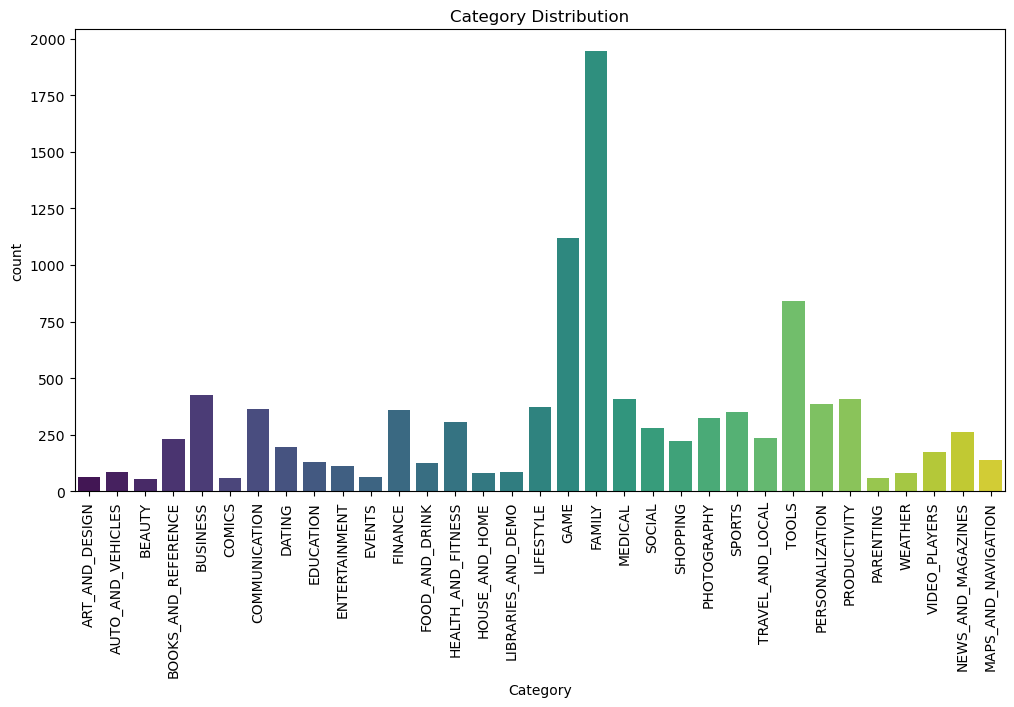

In [56]:
#Category Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', data=df_app, palette='viridis')
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

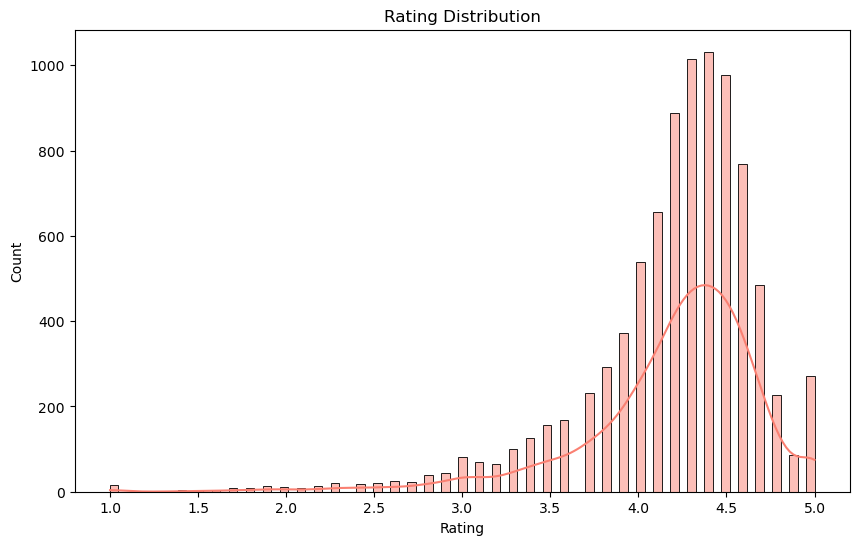

In [57]:
# Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_app['Rating'].dropna(), kde=True, color='salmon')
plt.title('Rating Distribution')
plt.show()

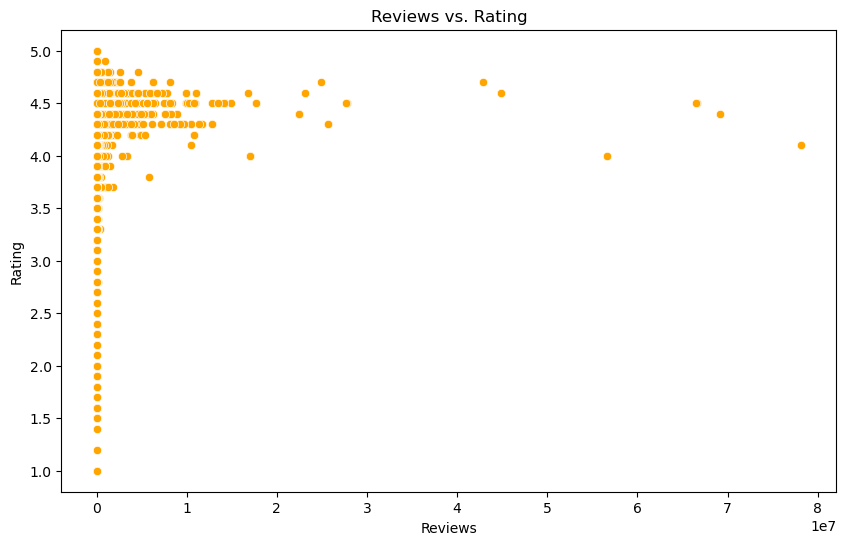

In [58]:
# Reviews vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df_app, color='orange')
plt.title('Reviews vs. Rating')
plt.show()


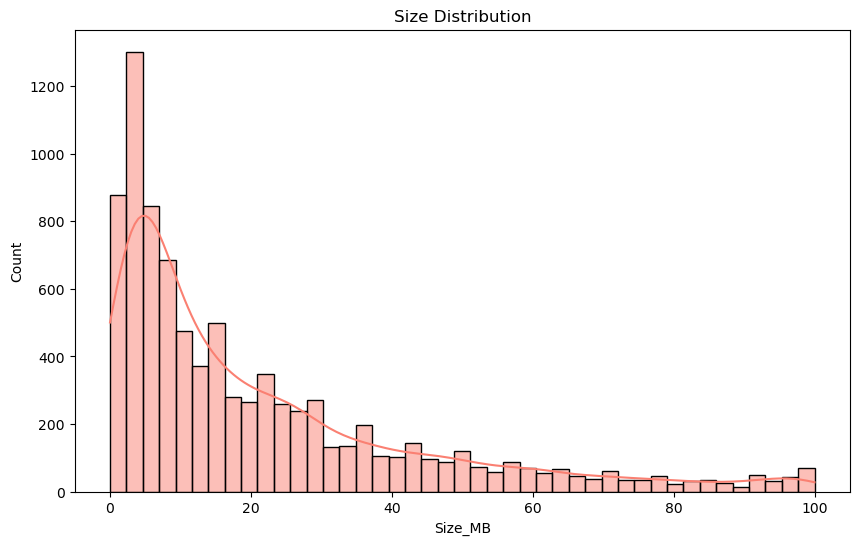

In [59]:
#Size Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_app['Size_MB'].dropna(), kde=True, color='salmon')
plt.title('Size Distribution')
plt.show()

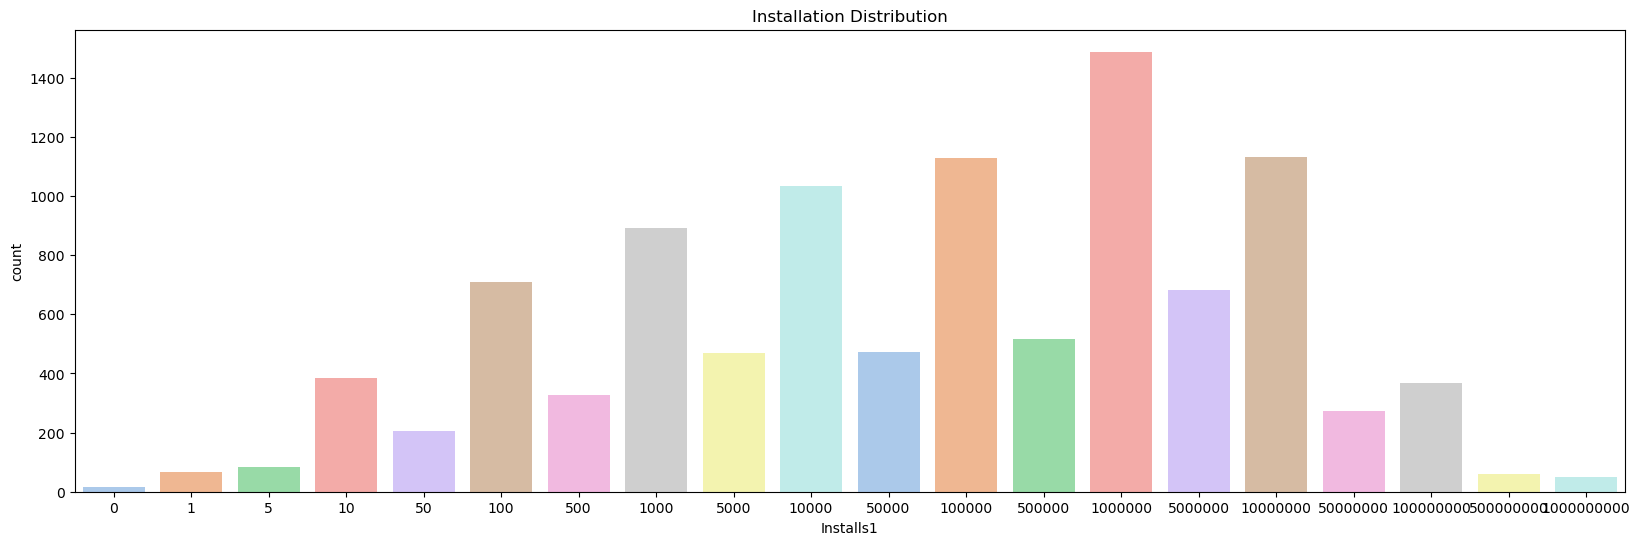

In [60]:
#Installation Distribution
plt.figure(figsize=(20, 6))
sns.countplot(x='Installs1', data=df_app, palette='pastel')
plt.title('Installation Distribution')
plt.show()

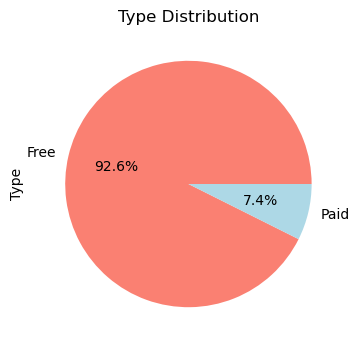

In [61]:
#Type Distribution
plt.figure(figsize=(4, 4))
df_app['Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['salmon', 'lightblue'])
plt.title('Type Distribution')
plt.show()

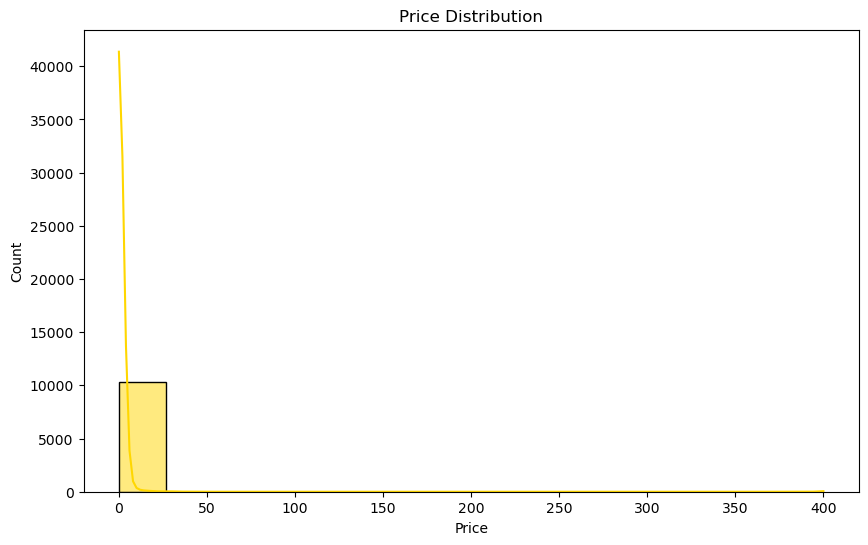

In [62]:
#Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_app['Price'], kde=True, color='gold')
plt.title('Price Distribution')
plt.show()

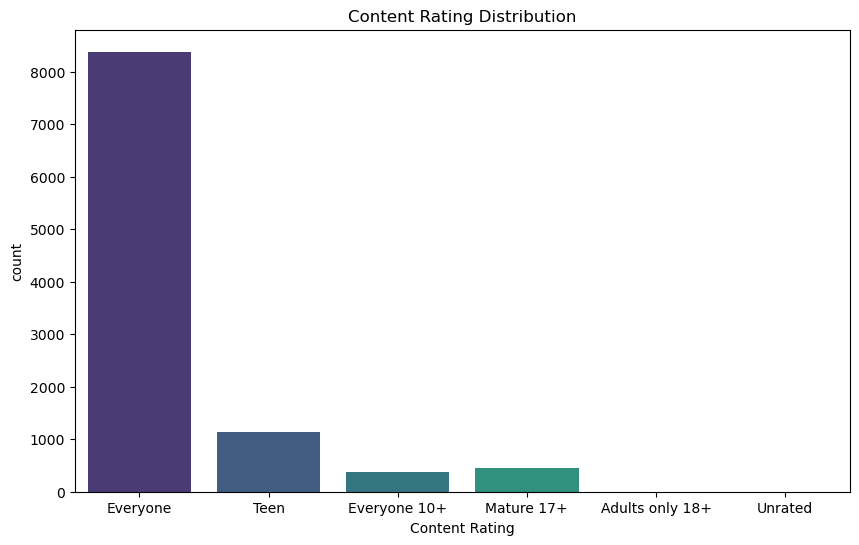

In [63]:
#Content Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Content Rating', data=df_app, palette='viridis')
plt.title('Content Rating Distribution')
plt.show()

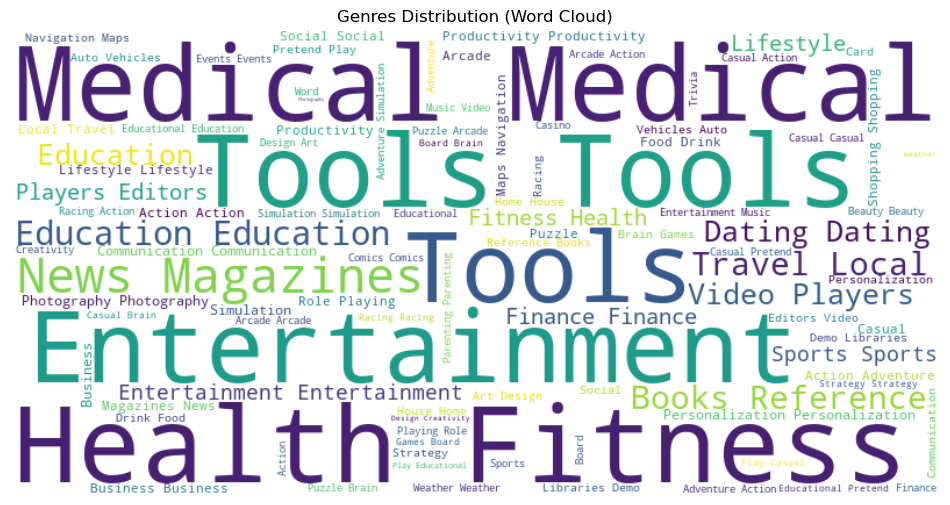

In [64]:
#Genres Distribution
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(' '.join(df_app['Genres']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genres Distribution (Word Cloud)')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\3268349324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['Last Updated'] = pd.to_datetime(df_app['Last Updated'])
C:\Users\Hp\AppData\Local\Temp\ipykernel_10064\3268349324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_app['Last Updated Year'] = df_app['Last Updated'].dt.year


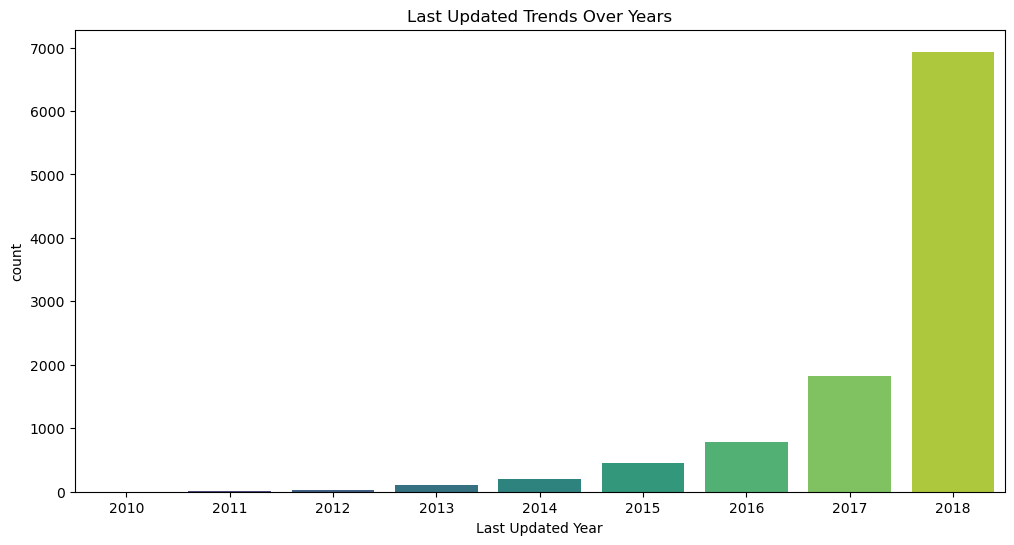

In [65]:
#Last Updated Trends
df_app['Last Updated'] = pd.to_datetime(df_app['Last Updated'])
df_app['Last Updated Year'] = df_app['Last Updated'].dt.year

plt.figure(figsize=(12, 6))
sns.countplot(x='Last Updated Year', data=df_app, palette='viridis')
plt.title('Last Updated Trends Over Years')
plt.show()

Check Numeric variables for 'Category' , 'Content Rating' and 'Type'

In [66]:
Numeric_Variables = df_app[['Rating','Reviews','Price','Installs1','Size_MB']]

In [67]:
def visual(feature , column):    
        top_categories = df_app.groupby(feature)[column].mean().nlargest(20).index
        plt.figure(figsize=(20, 6))
        sns.barplot(x=feature, y=column, data=df_app[df_app[feature].isin(top_categories)], palette='viridis')
        plt.title(f'Mean {column} for Top 20 {feature}')
        plt.xticks(rotation=45)
        plt.show()

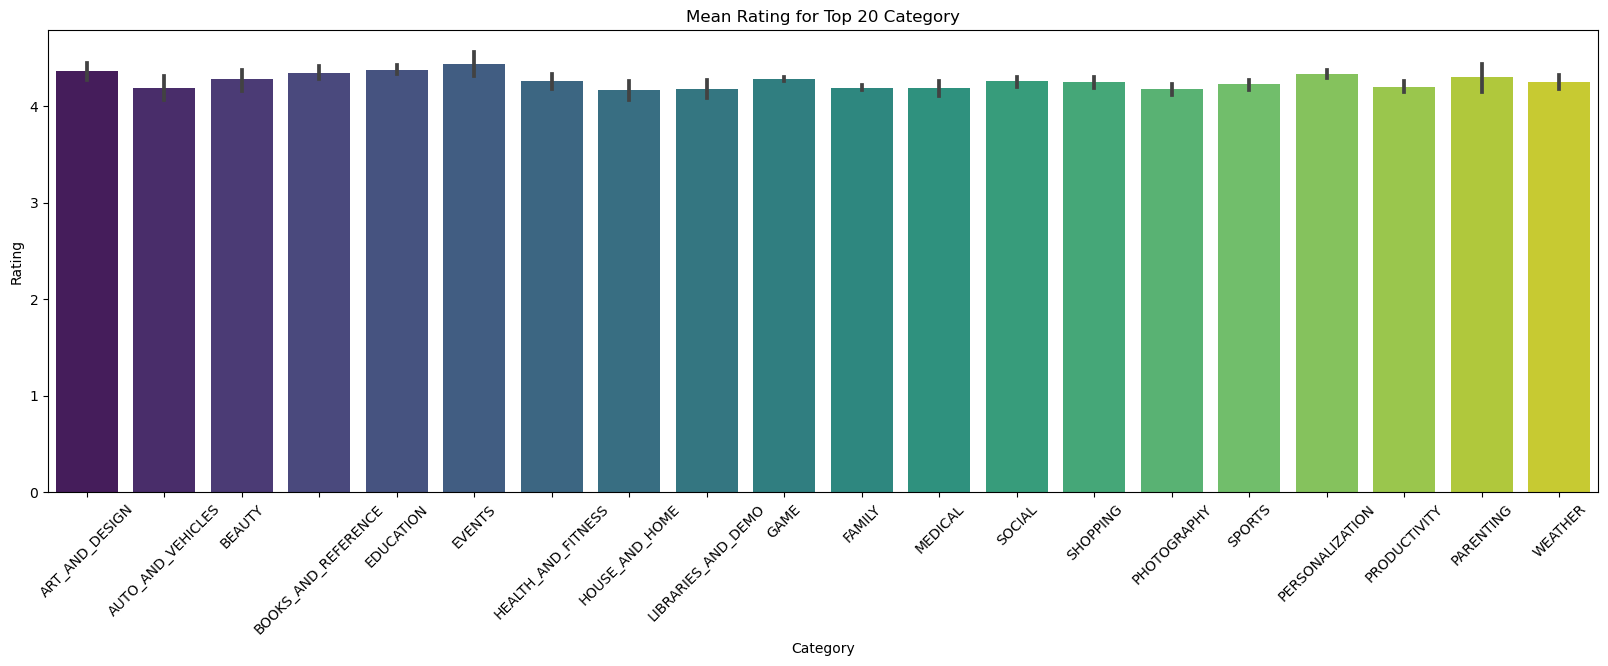

In [68]:
visual('Category' , Numeric_Variables.columns[0])

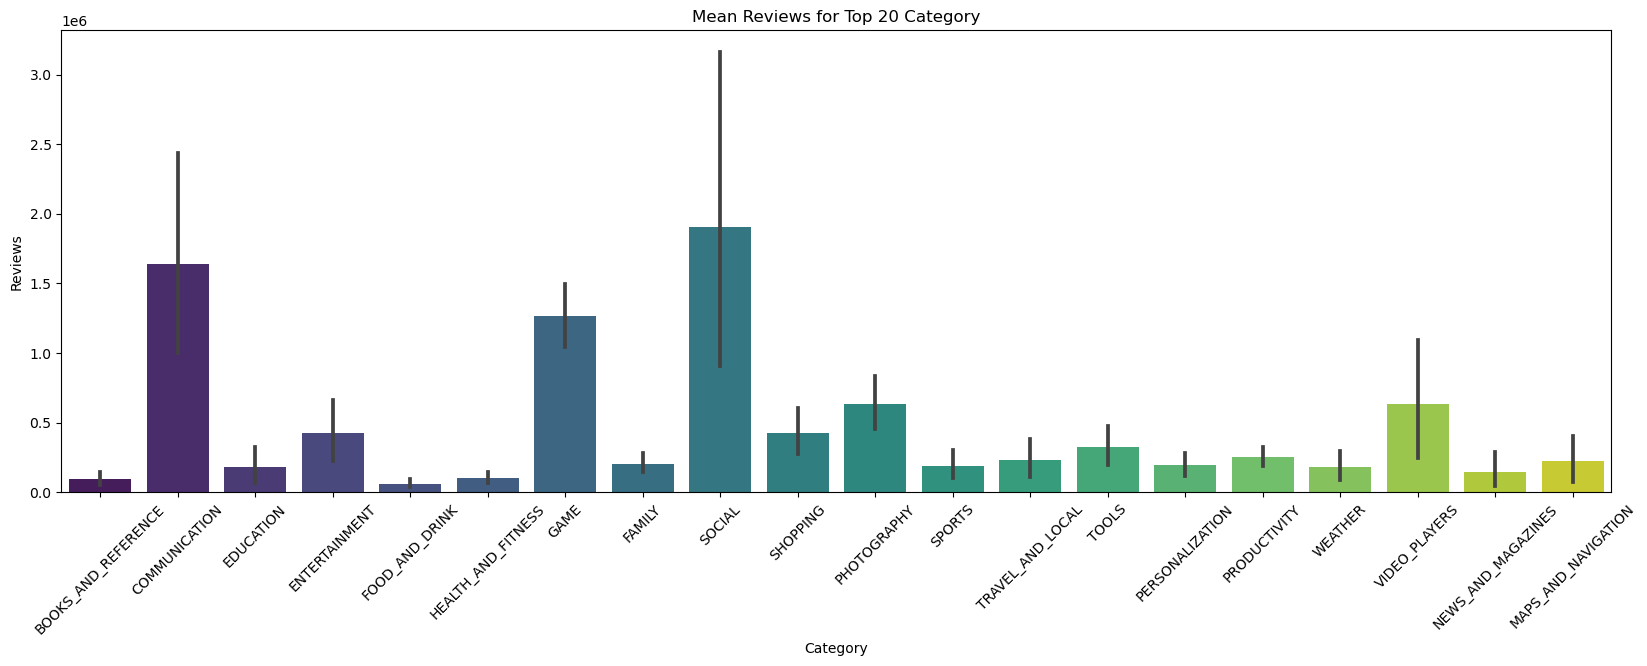

In [69]:
visual('Category' , Numeric_Variables.columns[1])

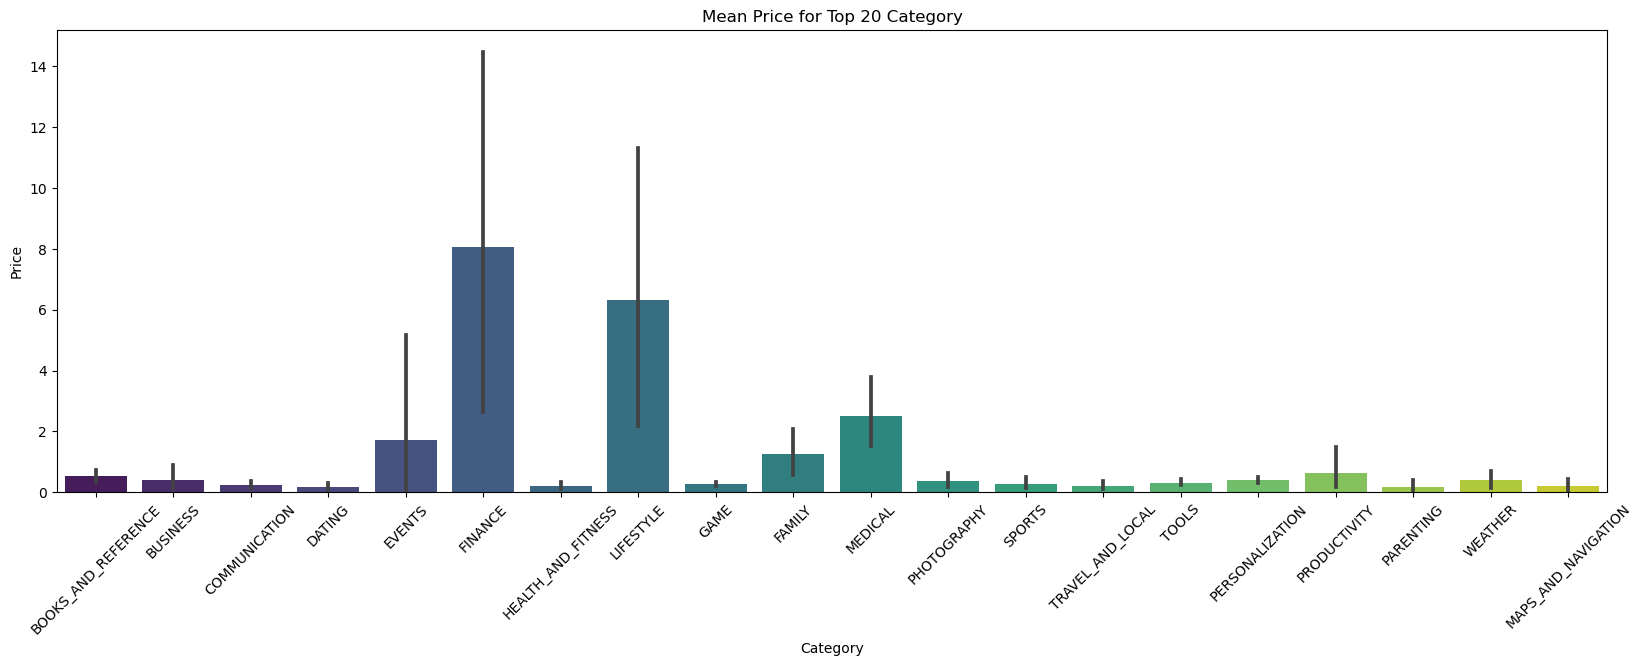

In [70]:
visual('Category' , Numeric_Variables.columns[2])

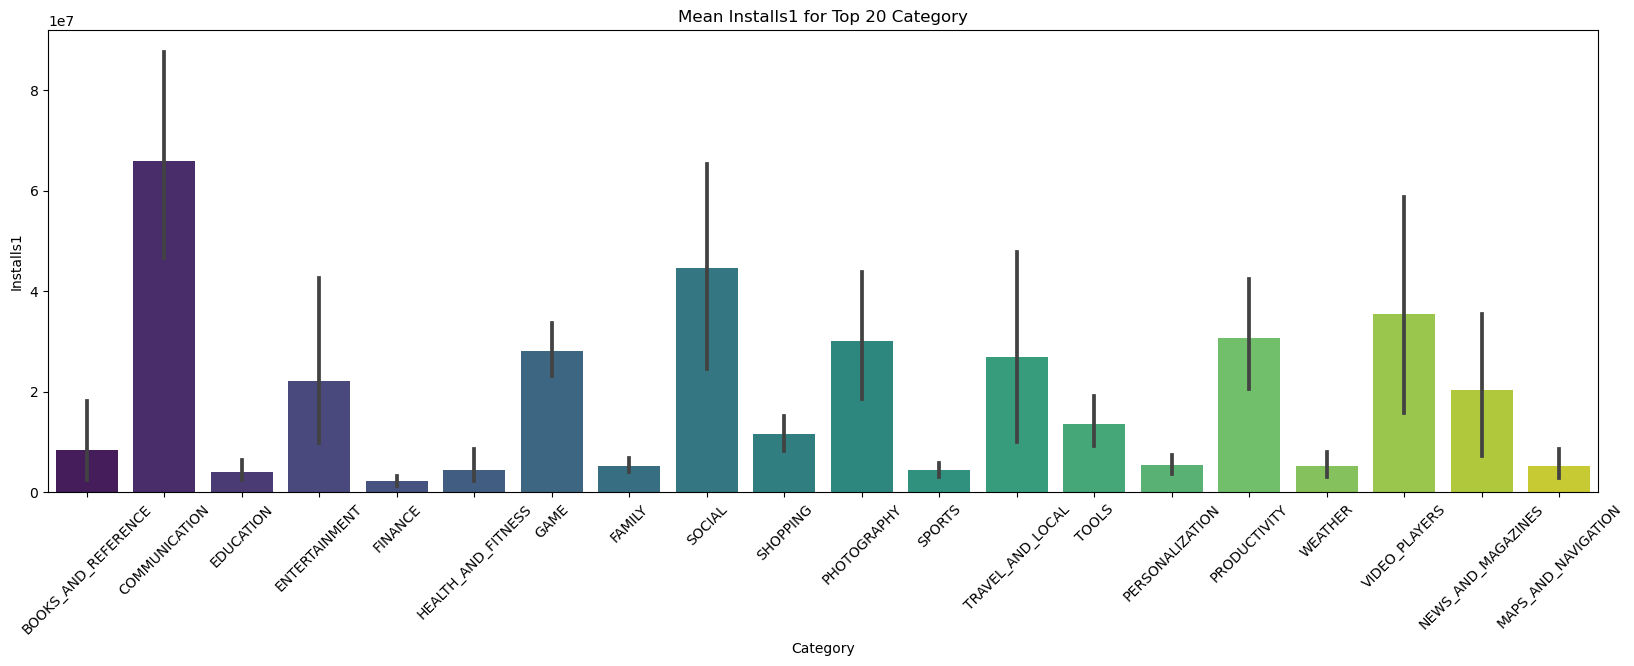

In [71]:
visual('Category' , Numeric_Variables.columns[3])

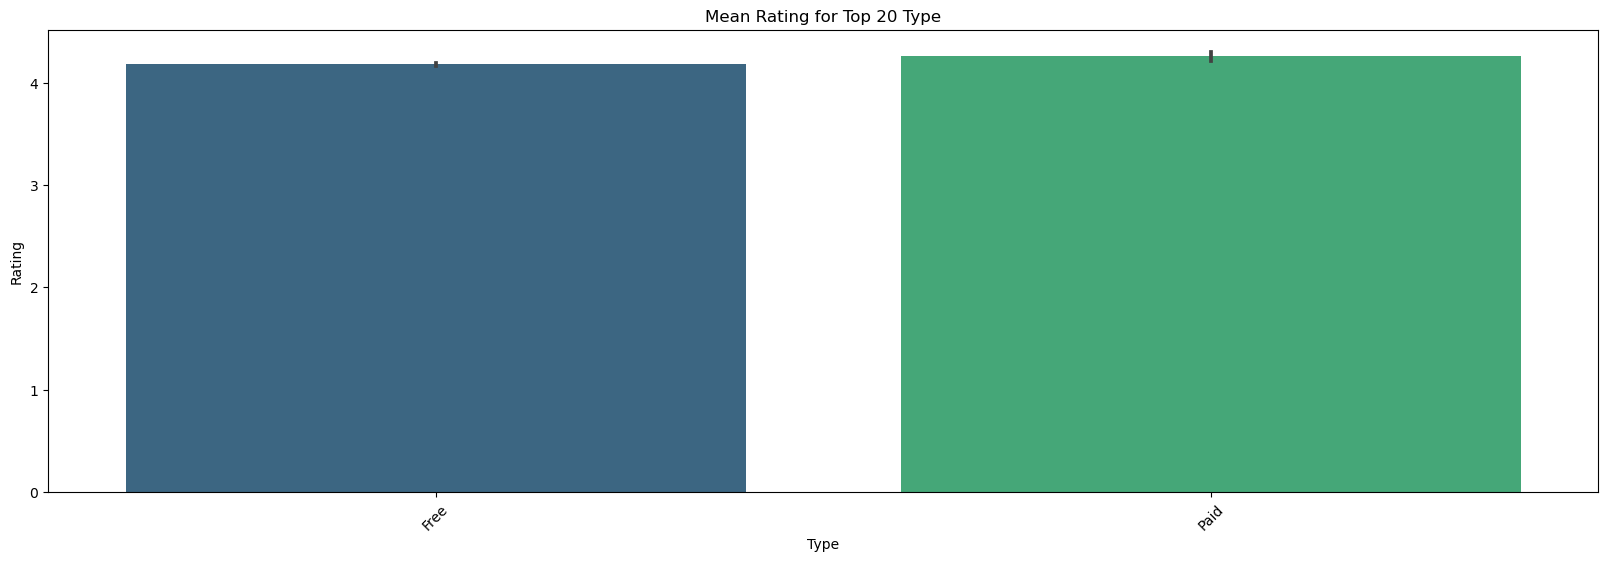

In [72]:
visual('Type' , Numeric_Variables.columns[0])

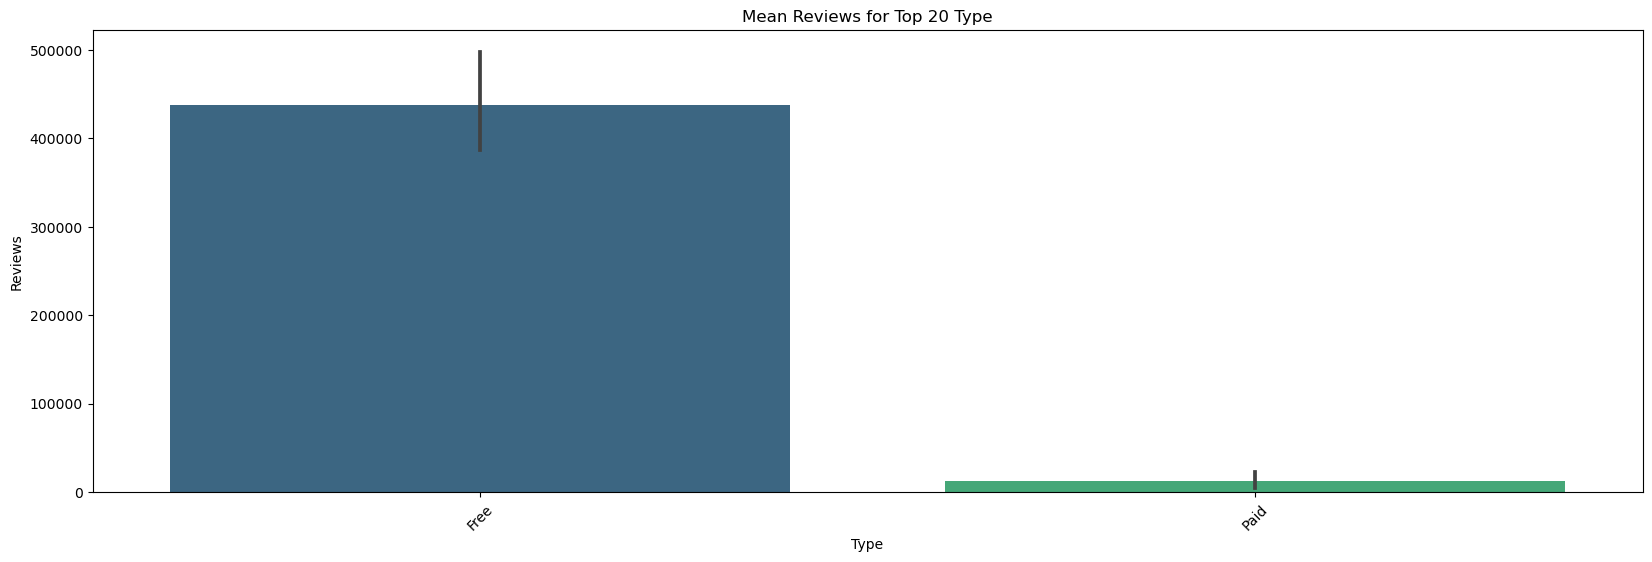

In [73]:
visual('Type' , Numeric_Variables.columns[1])

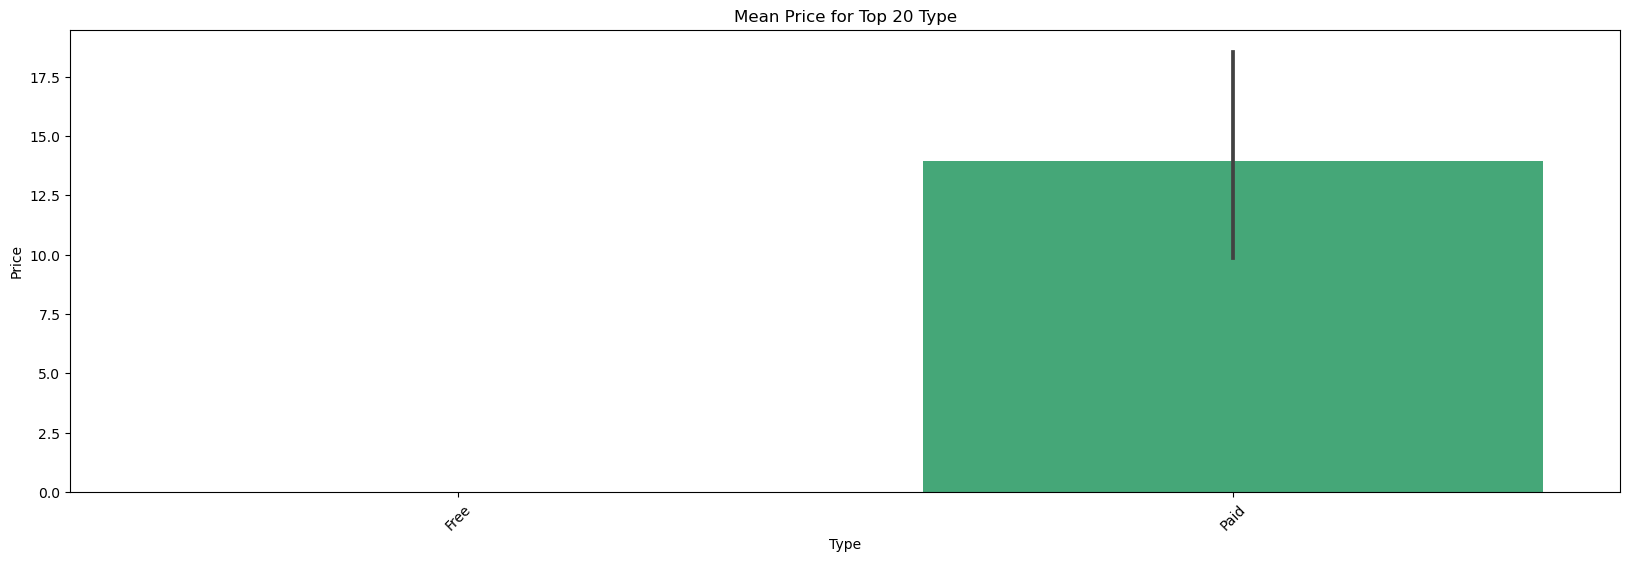

In [74]:
visual('Type' , Numeric_Variables.columns[2])

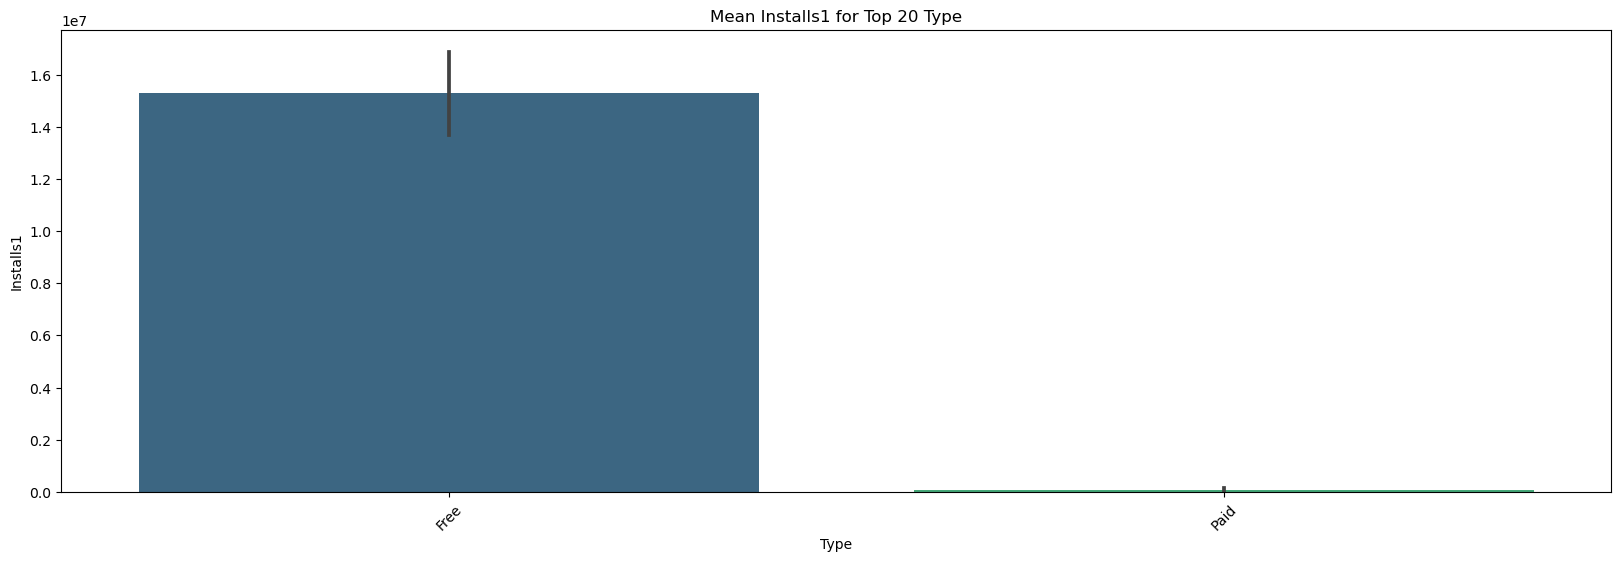

In [75]:
visual('Type' , Numeric_Variables.columns[3])

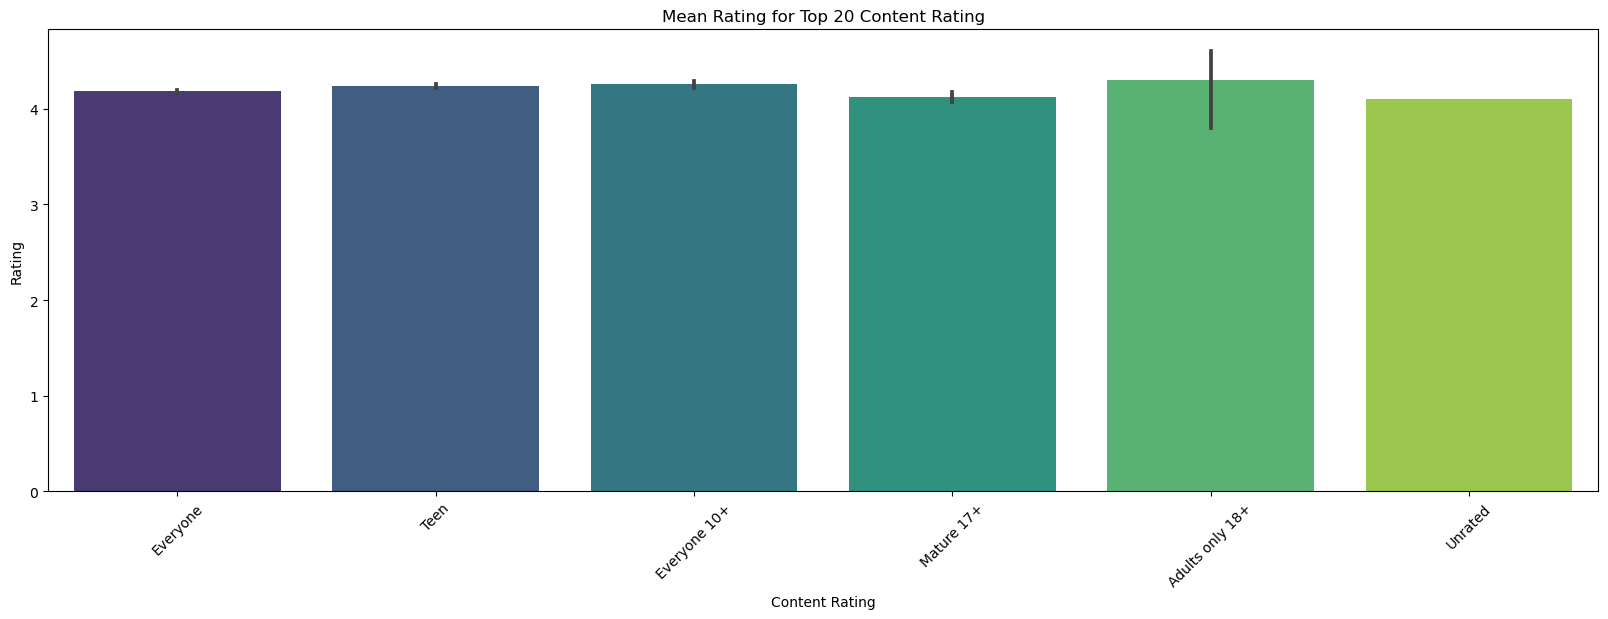

In [76]:
visual('Content Rating' , Numeric_Variables.columns[0])

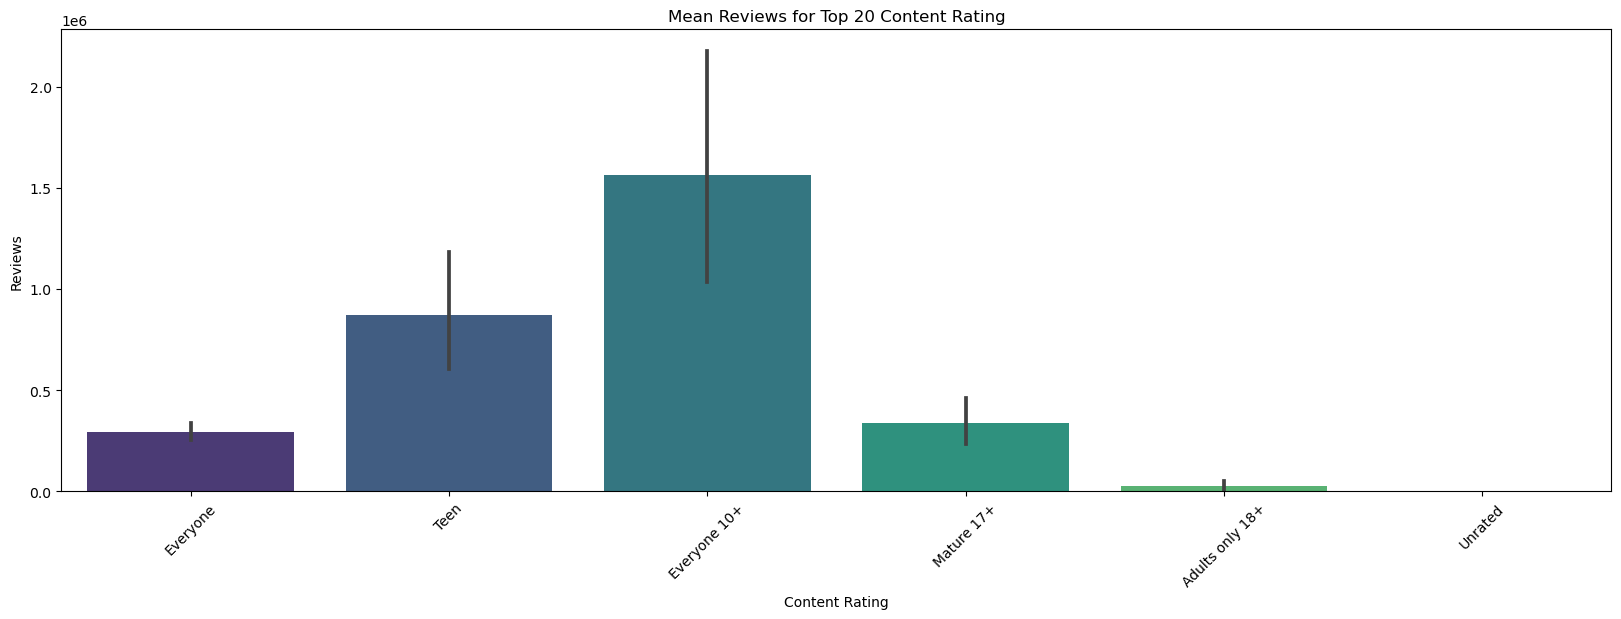

In [77]:
visual('Content Rating' , Numeric_Variables.columns[1])

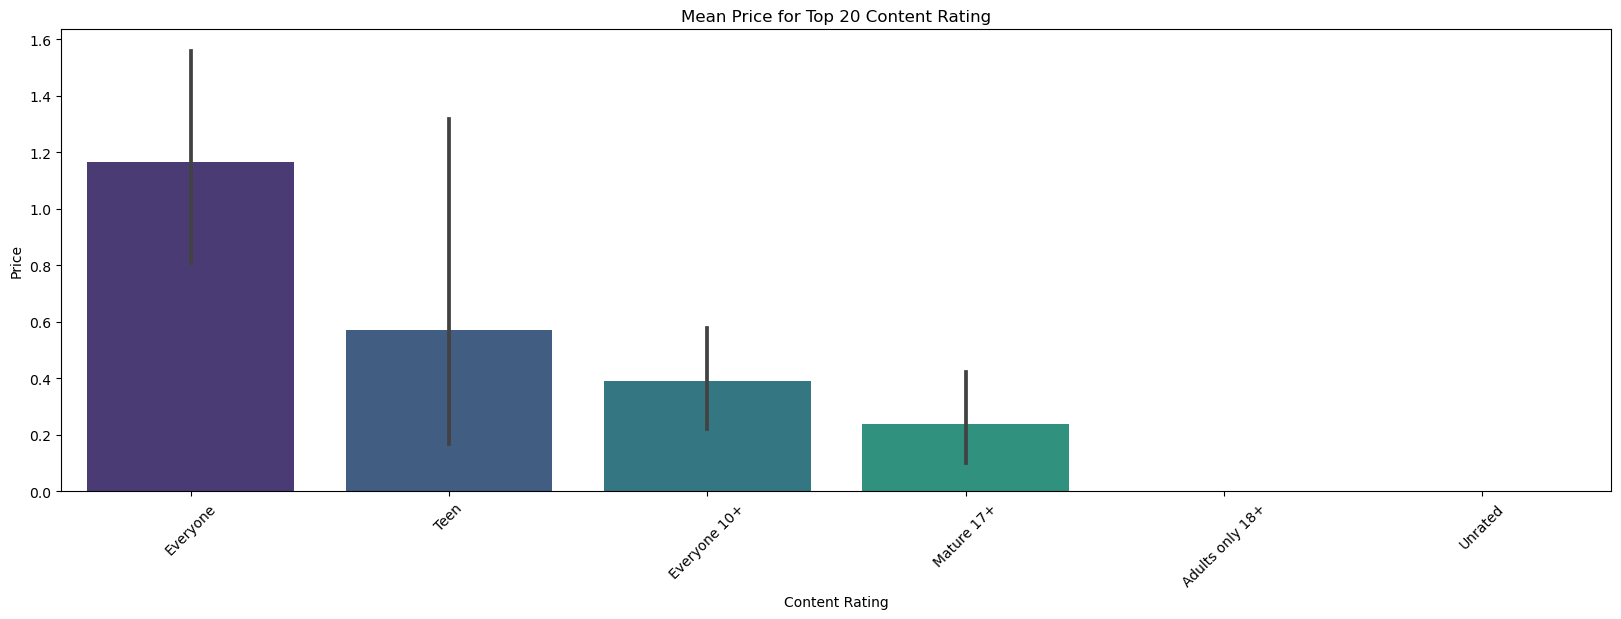

In [78]:
visual('Content Rating' , Numeric_Variables.columns[2])

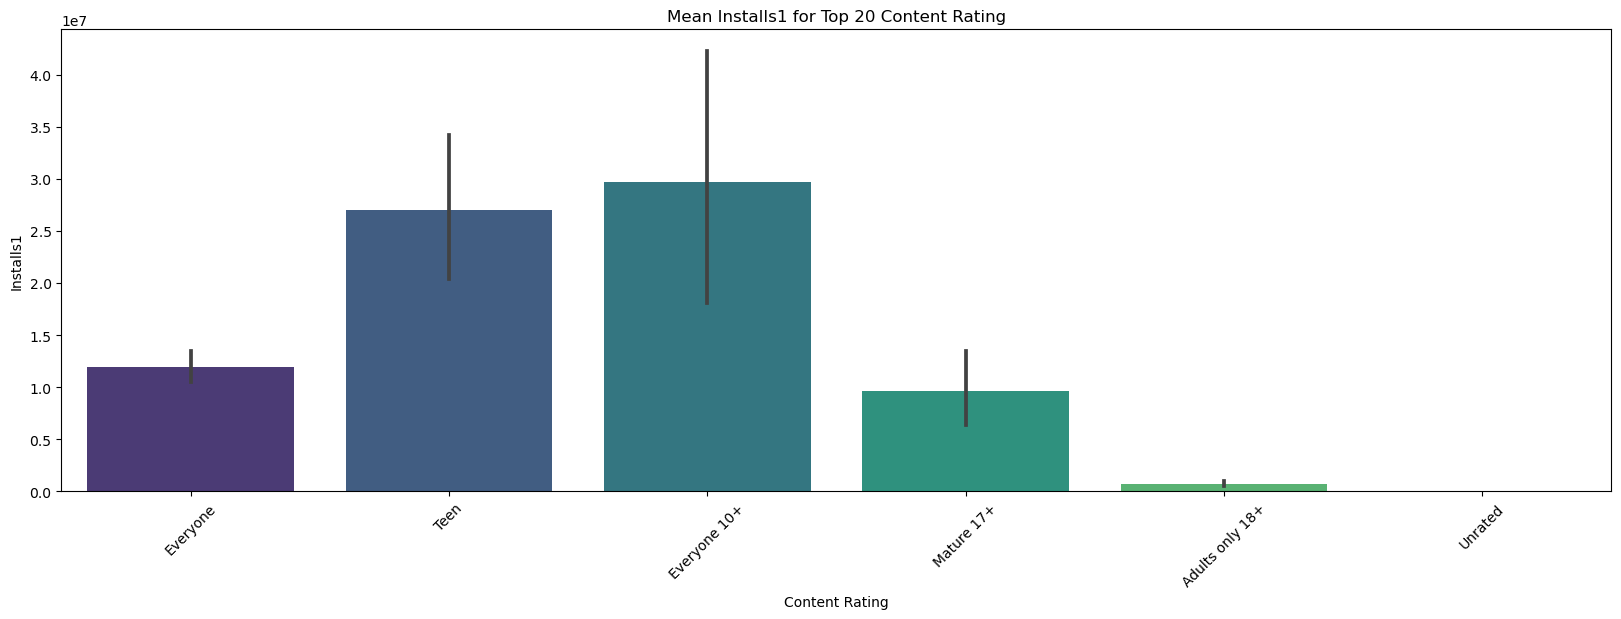

In [79]:
visual('Content Rating' , Numeric_Variables.columns[3])

In [80]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [81]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     29692 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29692 non-null  object 
 3   Sentiment_Polarity      29692 non-null  float64
 4   Sentiment_Subjectivity  29692 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


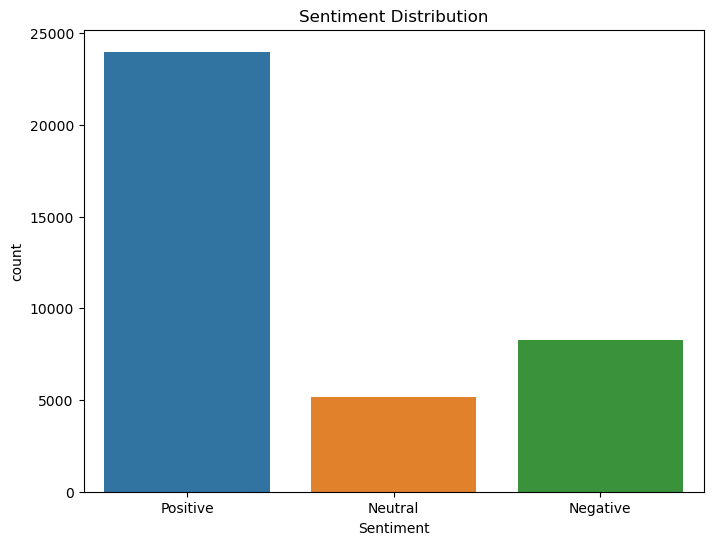

In [82]:
#Sentiment Distribution: Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=reviews_df)
plt.title('Sentiment Distribution')
plt.show()

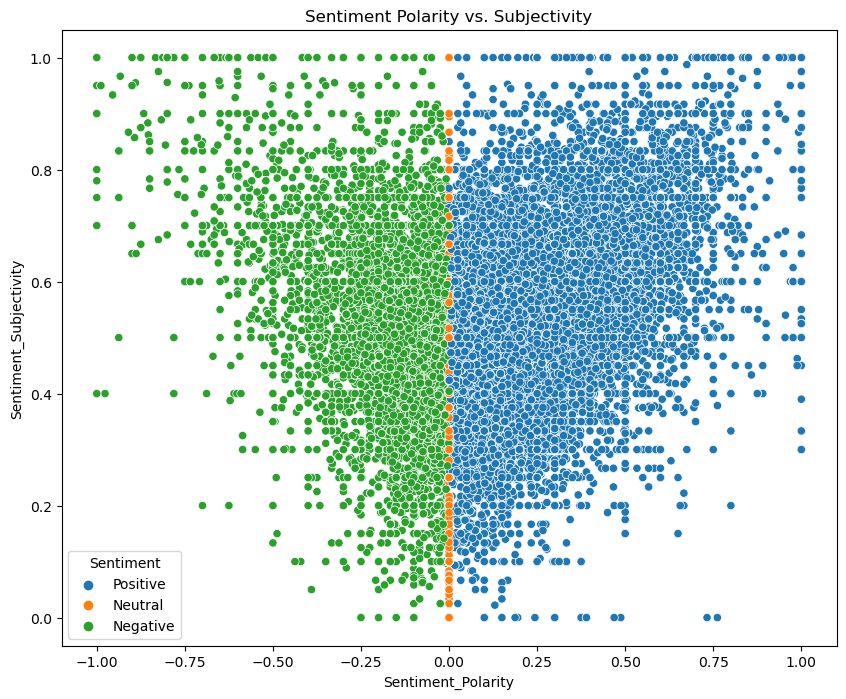

In [83]:
#Sentiment Polarity vs. Subjectivity: Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Sentiment_Polarity', y='Sentiment_Subjectivity', hue='Sentiment', data=reviews_df)
plt.title('Sentiment Polarity vs. Subjectivity')
plt.show()

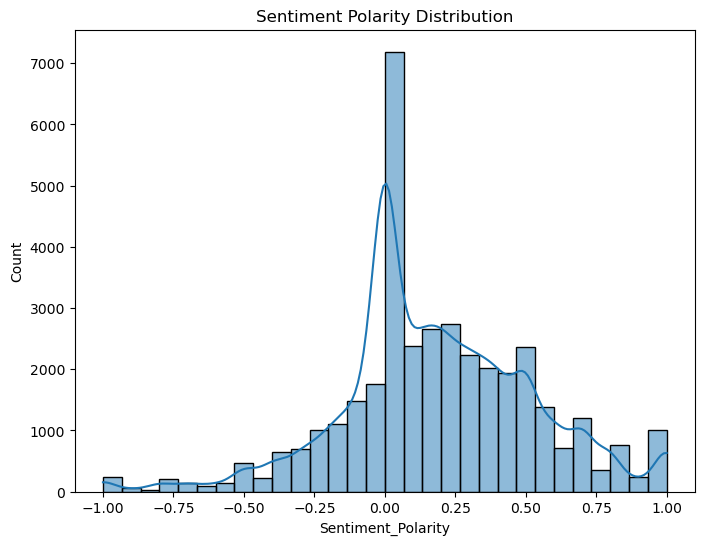

In [84]:
#Sentiment Polarity Distribution: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Sentiment_Polarity'], bins=30, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.show()


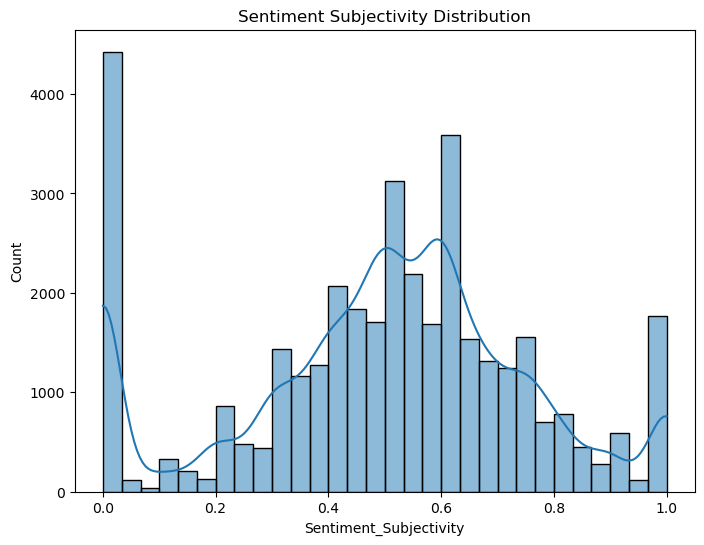

In [85]:
#Sentiment Subjectivity Distribution: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Sentiment_Subjectivity'], bins=30, kde=True)
plt.title('Sentiment Subjectivity Distribution')
plt.show()

In [86]:
df_app.to_csv('CleanedAppsData.csv', index=False)
df_reviews.to_csv('CleanedReviewsData.csv', index=False)